#**Importing Library Packages**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#**Loading Dataset**

In [21]:
# Load data
df = pd.read_csv('Flight_delay.csv',nrows=100000)
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


#**Handling Null Values**

In [22]:
df.isna().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

,0
DayOfWeek,0
Date,0
DepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
Airline,0
FlightNum,0
TailNum,0
ActualElapsedTime,0


#**Preprocessing**

In [25]:
# Create a new column for flight status
df['FlightStatus'] = pd.cut(df['ArrDelay'], bins=[-np.inf, -1, 15, np.inf], labels=['Early', 'On-time', 'Delayed'])
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [8]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
0,3,2019-01-03,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,10,0,N,0,2,0,0,0,32,Delayed
1,3,2019-01-03,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,7,0,N,0,10,0,0,0,47,Delayed
2,3,2019-01-03,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,8,0,N,0,8,0,0,0,72,Delayed
3,3,2019-01-03,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,8,0,N,0,3,0,0,0,12,On-time
4,3,2019-01-03,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,9,0,N,0,0,0,0,0,16,Delayed


#**Visualizations**

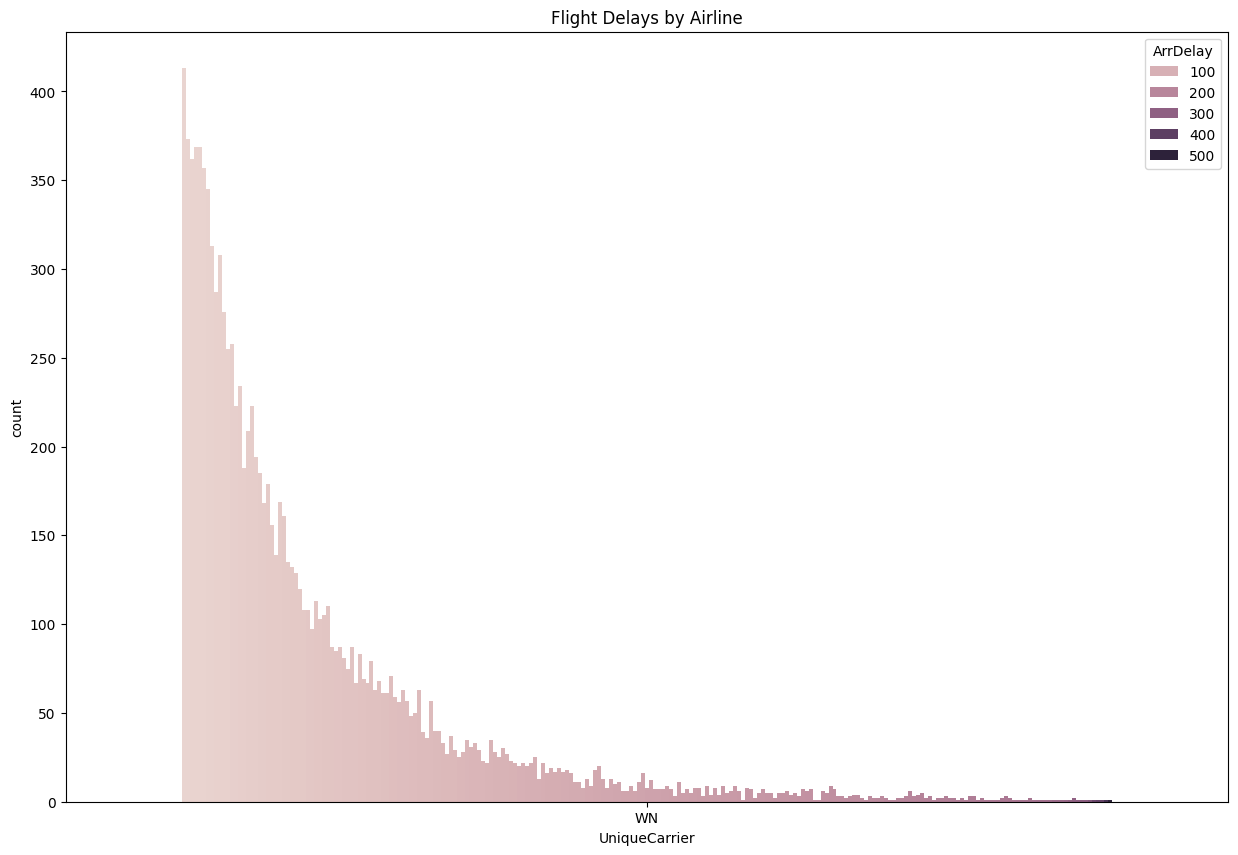

In [7]:
plt.figure(figsize=(15, 10))
# Visualization 1: Flight delays by airline
sns.countplot(data=df, x='UniqueCarrier', hue='ArrDelay')
plt.title('Flight Delays by Airline')
plt.show()

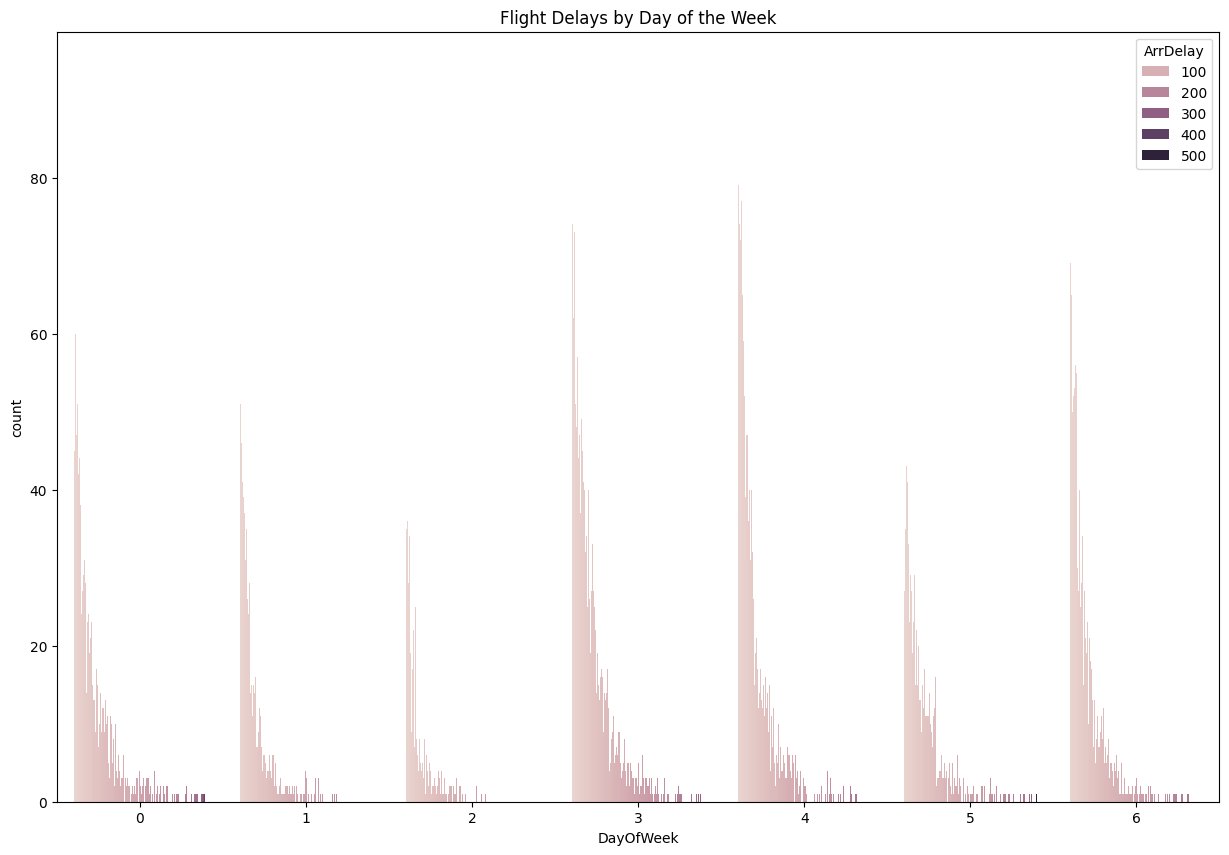

In [8]:
plt.figure(figsize=(15, 10))
# Visualization 2: Flight delays by day of the week
sns.countplot(data=df, x='DayOfWeek', hue='ArrDelay')
plt.title('Flight Delays by Day of the Week')
plt.show()


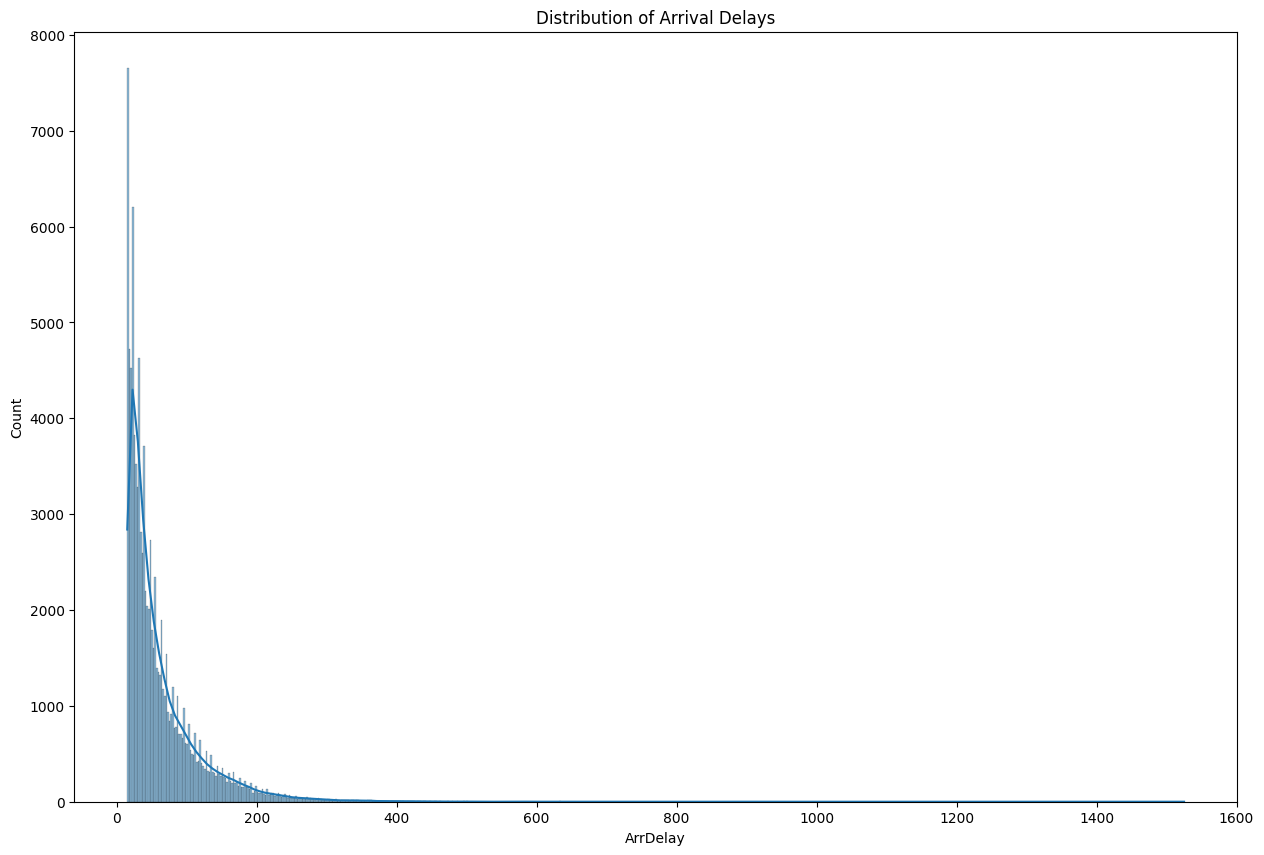

In [ ]:
plt.figure(figsize=(15, 10))
# Visualization 3: Distribution of arrival delays
sns.histplot(data=df, x='ArrDelay', kde=True)
plt.title('Distribution of Arrival Delays')
plt.show()

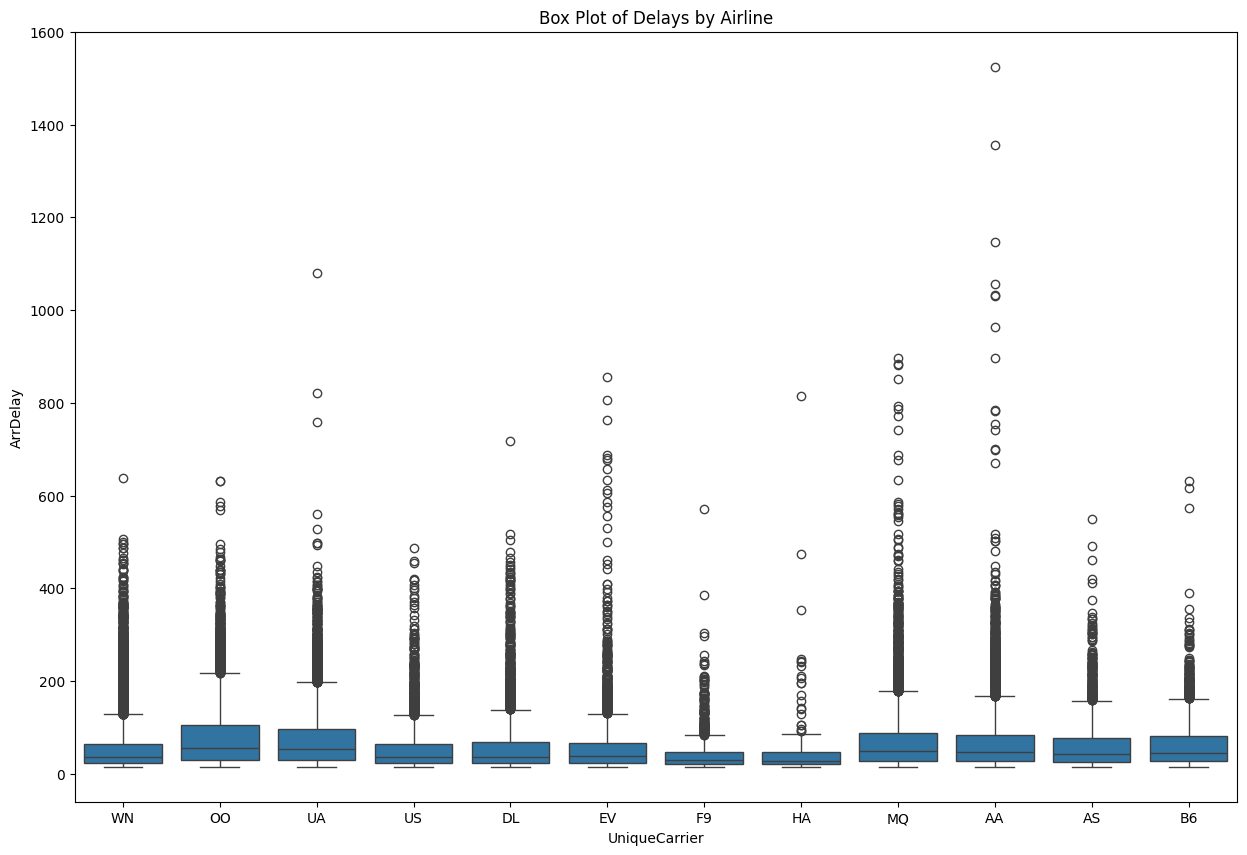

In [ ]:
plt.figure(figsize=(15, 10))
# Visualization 4: Box plot of delays by airline
sns.boxplot(data=df, x='UniqueCarrier', y='ArrDelay')
plt.title('Box Plot of Delays by Airline')
plt.show()

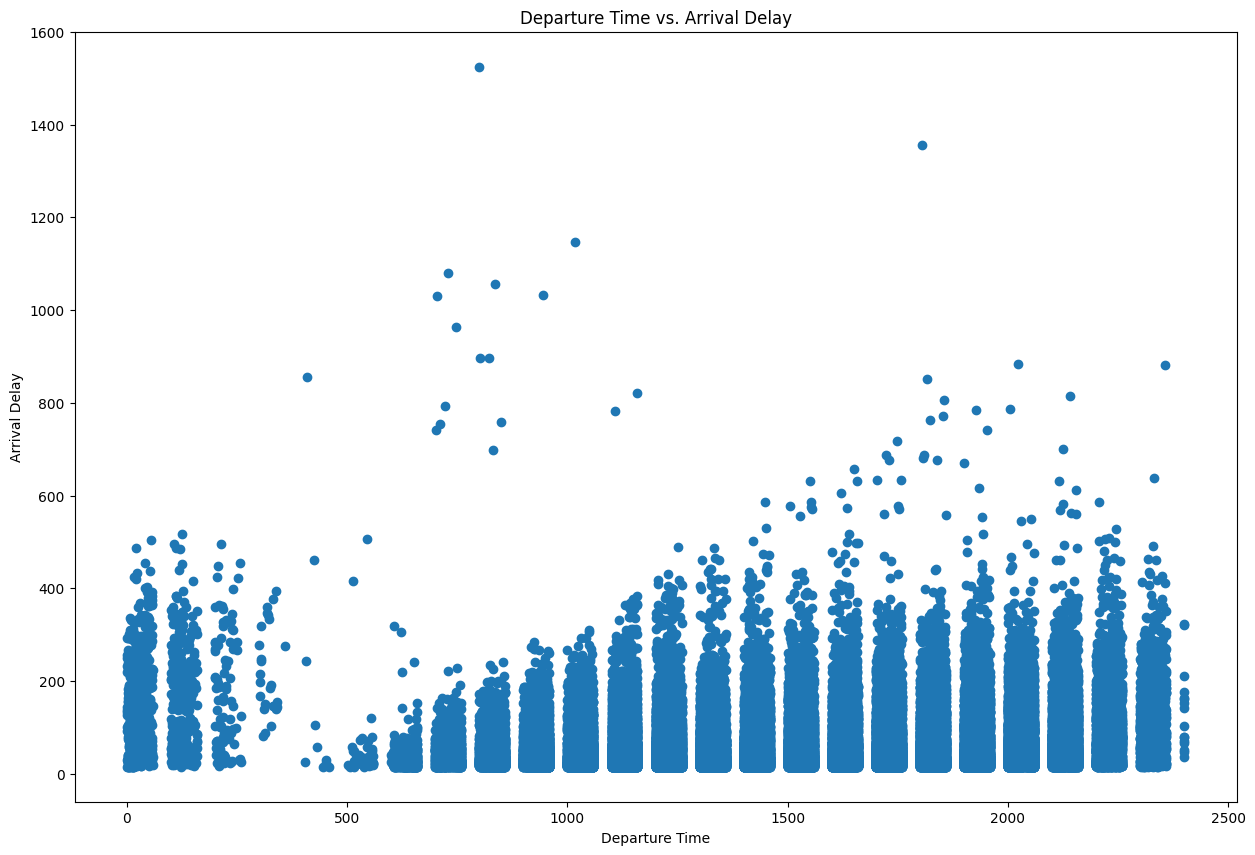

In [ ]:
plt.figure(figsize=(15, 10))
# Visualization 5: Scatter plot of departure time vs. arrival delay
plt.scatter(df['DepTime'], df['ArrDelay'])
plt.xlabel('Departure Time')
plt.ylabel('Arrival Delay')
plt.title('Departure Time vs. Arrival Delay')
plt.show()

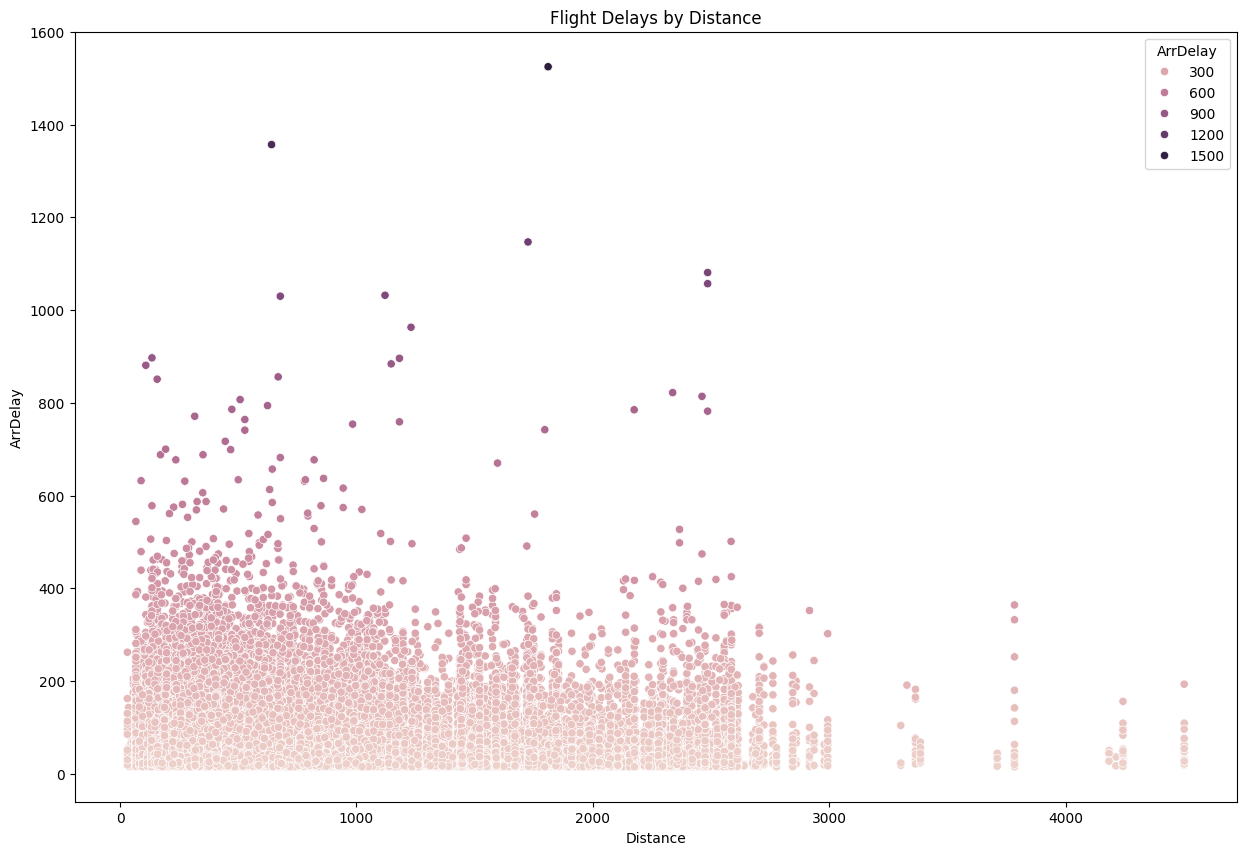

In [ ]:
plt.figure(figsize=(15, 10))
# Visualization 6: Flight delays by distance
sns.scatterplot(data=df, x='Distance', y='ArrDelay', hue='ArrDelay')
plt.title('Flight Delays by Distance')
plt.show()

#**Label Encoding**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99477 entries, 0 to 99999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   DayOfWeek          99477 non-null  int32         
 1   Date               99477 non-null  datetime64[ns]
 2   DepTime            99477 non-null  int64         
 3   ArrTime            99477 non-null  int64         
 4   CRSArrTime         99477 non-null  int64         
 5   UniqueCarrier      99477 non-null  object        
 6   Airline            99477 non-null  object        
 7   FlightNum          99477 non-null  int64         
 8   TailNum            99477 non-null  object        
 9   ActualElapsedTime  99477 non-null  int64         
 10  CRSElapsedTime     99477 non-null  int64         
 11  AirTime            99477 non-null  int64         
 12  ArrDelay           99477 non-null  int64         
 13  DepDelay           99477 non-null  int64         
 14  Origin     

In [27]:
# Automatic label encoding for object data types
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
for column in df.select_dtypes(include=['category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
0,3,2019-01-03,1829,1959,1925,11,9,3920,1089,90,...,10,0,0,0,2,0,0,0,32,0
1,3,2019-01-03,1937,2037,1940,11,9,509,2523,240,...,7,0,0,0,10,0,0,0,47,0
2,3,2019-01-03,1644,1845,1725,11,9,1333,495,121,...,8,0,0,0,8,0,0,0,72,0
3,3,2019-01-03,1452,1640,1625,11,9,675,353,228,...,8,0,0,0,3,0,0,0,12,1
4,3,2019-01-03,1323,1526,1510,11,9,4,2188,123,...,9,0,0,0,0,0,0,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,2019-02-18,2103,2222,2150,11,9,1312,430,79,...,26,0,0,0,0,0,9,0,23,0
99996,0,2019-02-18,1339,1456,1440,11,9,2092,2262,77,...,24,0,0,0,0,0,2,0,14,0
99997,0,2019-02-18,1123,1238,1220,11,9,2180,284,75,...,14,0,0,0,0,0,0,0,18,0
99998,0,2019-02-18,1212,1320,1305,11,9,331,2610,68,...,22,0,0,0,0,0,8,0,7,1


#**Correlation Analysis**

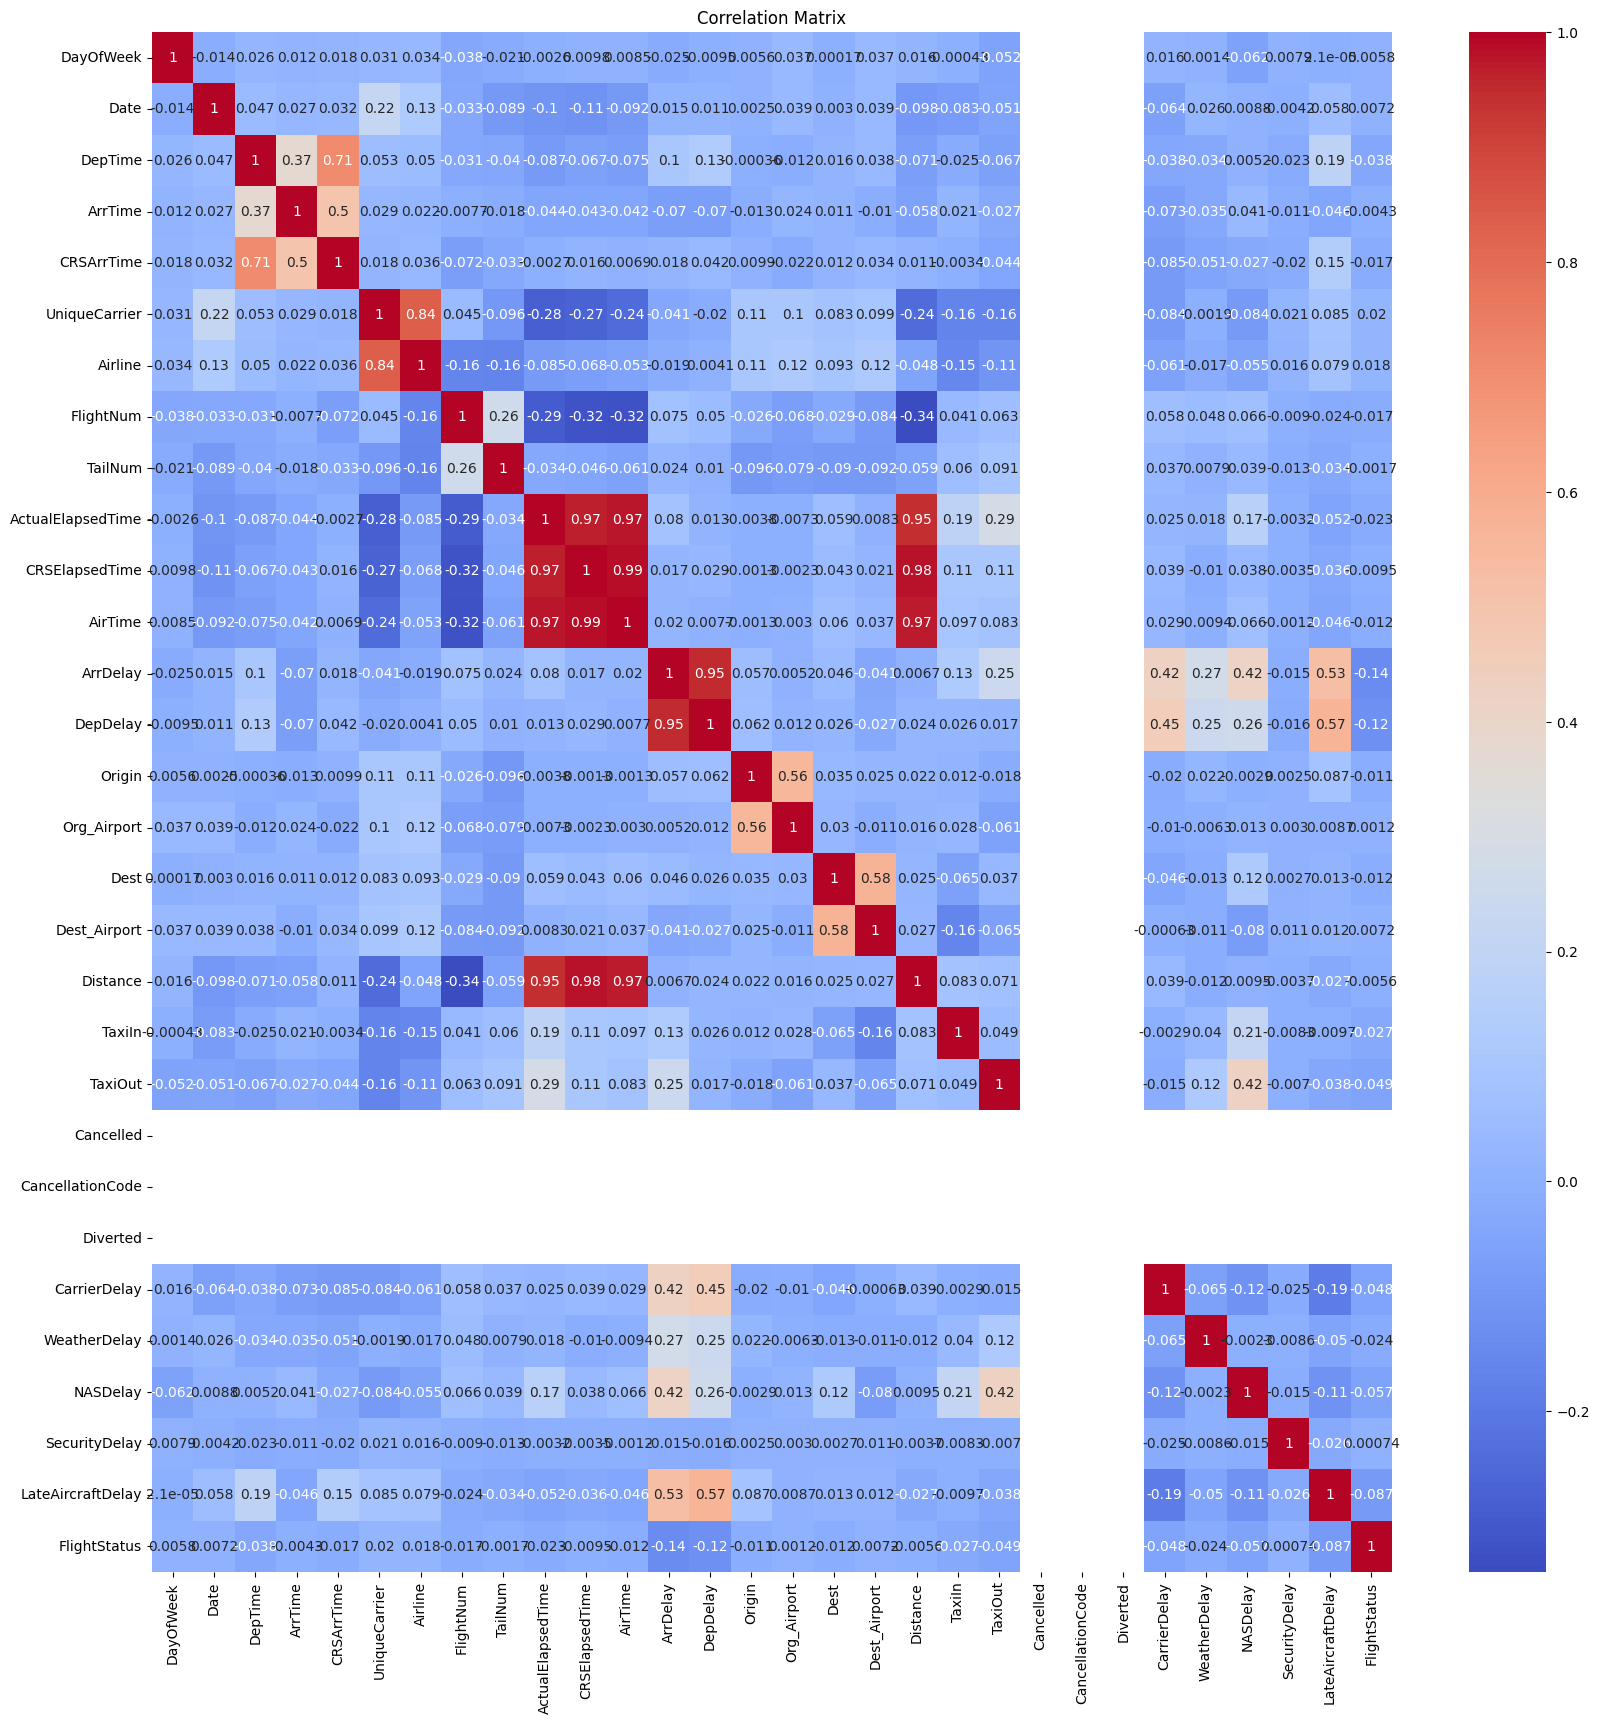

In [ ]:
plt.figure(figsize=(20, 20))
# Visualization 7: Heatmap of correlation matrix
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.corr()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
DayOfWeek,1.000000,-0.014090,0.025987,0.012132,0.018283,0.030955,0.034181,-0.038441,-0.021169,-0.002641,...,-0.052195,NaN,NaN,NaN,0.015687,0.001413,-0.061791,0.007891,0.000021,0.005834
Date,-0.014090,1.000000,0.047433,0.027245,0.032399,0.218103,0.129845,-0.033393,-0.088700,-0.104370,...,-0.050972,NaN,NaN,NaN,-0.064152,0.026006,0.008813,-0.004172,0.057951,0.007187
DepTime,0.025987,0.047433,1.000000,0.372088,0.707885,0.053114,0.049894,-0.031150,-0.039515,-0.086607,...,-0.067384,NaN,NaN,NaN,-0.038464,-0.034092,0.005249,-0.022805,0.188511,-0.037674
ArrTime,0.012132,0.027245,0.372088,1.000000,0.501606,0.029177,0.021851,-0.007724,-0.017896,-0.043676,...,-0.026612,NaN,NaN,NaN,-0.072638,-0.035253,0.041263,-0.010613,-0.045750,-0.004306
CRSArrTime,0.018283,0.032399,0.707885,0.501606,1.000000,0.017929,0.035724,-0.071884,-0.033188,-0.002678,...,-0.043605,NaN,NaN,NaN,-0.085369,-0.050588,-0.026727,-0.020267,0.146319,-0.016682
UniqueCarrier,0.030955,0.218103,0.053114,0.029177,0.017929,1.000000,0.835086,0.045193,-0.096146,-0.279201,...,-0.162198,NaN,NaN,NaN,-0.083591,-0.001907,-0.083723,0.020940,0.084693,0.020193
Airline,0.034181,0.129845,0.049894,0.021851,0.035724,0.835086,1.000000,-0.161123,-0.162207,-0.085321,...,-0.108209,NaN,NaN,NaN,-0.061450,-0.017295,-0.055468,0.015598,0.079193,0.017815
FlightNum,-0.038441,-0.033393,-0.031150,-0.007724,-0.071884,0.045193,-0.161123,1.000000,0.263555,-0.288660,...,0.062730,NaN,NaN,NaN,0.058356,0.047583,0.065877,-0.008956,-0.023702,-0.016615
TailNum,-0.021169,-0.088700,-0.039515,-0.017896,-0.033188,-0.096146,-0.162207,0.263555,1.000000,-0.034164,...,0.090615,NaN,NaN,NaN,0.036863,0.007857,0.038852,-0.012642,-0.034380,-0.001672
ActualElapsedTime,-0.002641,-0.104370,-0.086607,-0.043676,-0.002678,-0.279201,-0.085321,-0.288660,-0.034164,1.000000,...,0.287300,NaN,NaN,NaN,0.024686,0.018466,0.166543,-0.003233,-0.051814,-0.023467


#**Feature Selection and Data Split**

In [28]:
# Features and target
features = df.drop(['ArrDelay', 'Date', 'TailNum', 'Cancelled', 'CancellationCode', 'Diverted','FlightStatus'], axis=1)
target = df['FlightStatus']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [12]:
# Printing the shape of the variables
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Printing sample data from each variable
print("\nSample data from X_train:\n", X_train.head())
print("\nSample data from X_test:\n", X_test.head())
print("\nSample data from y_train:\n", y_train.head())
print("\nSample data from y_test:\n", y_test.head())

Shape of X_train: (79581, 23)
Shape of X_test: (19896, 23)
Shape of y_train: (79581,)
Shape of y_test: (19896,)

Sample data from X_train:
        DayOfWeek  DepTime  ArrTime  CRSArrTime  UniqueCarrier  Airline  \
56703          1      903     1056        1017              5        5   
19934          6     1153     1409        1156              8        8   
69252          0     1953     2223        1955              0        1   
27314          0     1300     1438        1217              8        8   
15654          2     1210     1340        1315             11        9   

       FlightNum  ActualElapsedTime  CRSElapsedTime  AirTime  ...  Dest  \
56703        851                113             117       96  ...   185   
19934       6371                196             178      162  ...    14   
69252        408                150             120       87  ...   178   
27314       3809                158             127       92  ...   222   
15654        179                 90     

#**Machine and Deep Learning models and Evaluation**

In [31]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, InputLayer
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Convert y_train and y_test to categorical if they are not already
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Ensure your data has the correct shape for the CNN model
# Typically, the shape should be (num_samples, timesteps, num_features)
X_train = np.expand_dims(X_train, axis=1)  # Adding the timestep dimension
X_test = np.expand_dims(X_test, axis=1)    # Adding the timestep dimension

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(InputLayer(input_shape=(X_train.shape[1], X_train.shape[2])))
cnn_model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))  # Kernel size adjusted to 1
cnn_model.add(MaxPooling1D(pool_size=1))  # Pooling size adjusted to 1
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(y_train.shape[1], activation='softmax'))

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
1244/1244 - 6s - 5ms/step - accuracy: 0.9501 - loss: 3.6149
Epoch 2/10
1244/1244 - 4s - 3ms/step - accuracy: 0.9549 - loss: 0.8344
Epoch 3/10
1244/1244 - 3s - 3ms/step - accuracy: 0.9560 - loss: 0.7715
Epoch 4/10
1244/1244 - 4s - 3ms/step - accuracy: 0.9586 - loss: 0.4966
Epoch 5/10
1244/1244 - 3s - 2ms/step - accuracy: 0.9589 - loss: 0.4317
Epoch 6/10
1244/1244 - 3s - 2ms/step - accuracy: 0.9611 - loss: 0.3546
Epoch 7/10
1244/1244 - 4s - 3ms/step - accuracy: 0.9610 - loss: 0.2642
Epoch 8/10
1244/1244 - 4s - 3ms/step - accuracy: 0.9629 - loss: 0.2041
Epoch 9/10
1244/1244 - 3s - 2ms/step - accuracy: 0.9630 - loss: 0.1952
Epoch 10/10
1244/1244 - 3s - 2ms/step - accuracy: 0.9647 - loss: 0.1488
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19340
           1       0.25      0.49      0.33       556

    accuracy                           0.94     198

622/622 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     19340
           1       0.25      0.49      0.33       556

    accuracy                           0.94     19896
   macro avg       0.62      0.72      0.65     19896
weighted avg       0.96      0.94      0.95     19896

CNN Model Confusion Matrix:
[[18502   838]
 [  282   274]]
622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


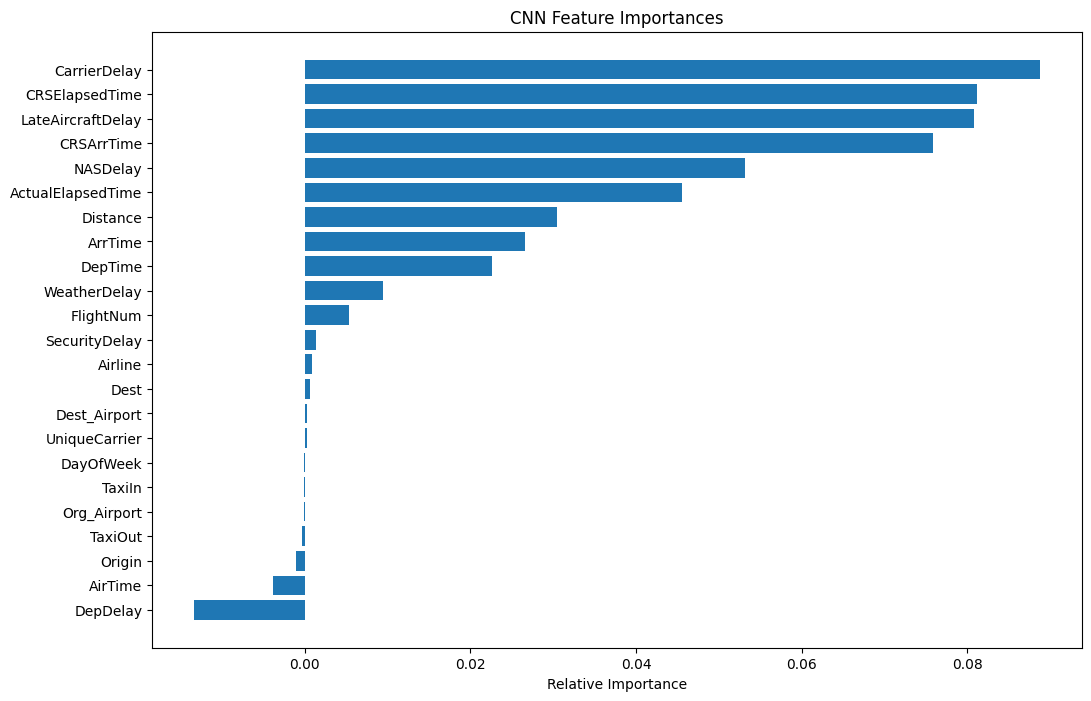

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.inspection import permutation_importance
# Evaluate the CNN model
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print("CNN Model Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))
print("CNN Model Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

# Use permutation importance to calculate feature importance
class CNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X = np.expand_dims(X, axis=1)  # Adding the timestep dimension
        return np.argmax(self.model.predict(X), axis=1)

cnn_wrapper = CNNWrapper(cnn_model)

result = permutation_importance(cnn_wrapper, X_test.squeeze(), y_test_classes, n_repeats=10, random_state=42, n_jobs=-1)

# Plot feature importance
importance = result.importances_mean
indices = np.argsort(importance)

plt.figure(figsize=(12, 8))
plt.title('CNN Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#ML models and  Feature Importance

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_it

LogisticRegression Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     19340
           1       0.63      0.21      0.32       556

    accuracy                           0.97     19896
   macro avg       0.80      0.61      0.65     19896
weighted avg       0.97      0.97      0.97     19896

LogisticRegression Best Model Confusion Matrix:
[[19270    70]
 [  437   119]]




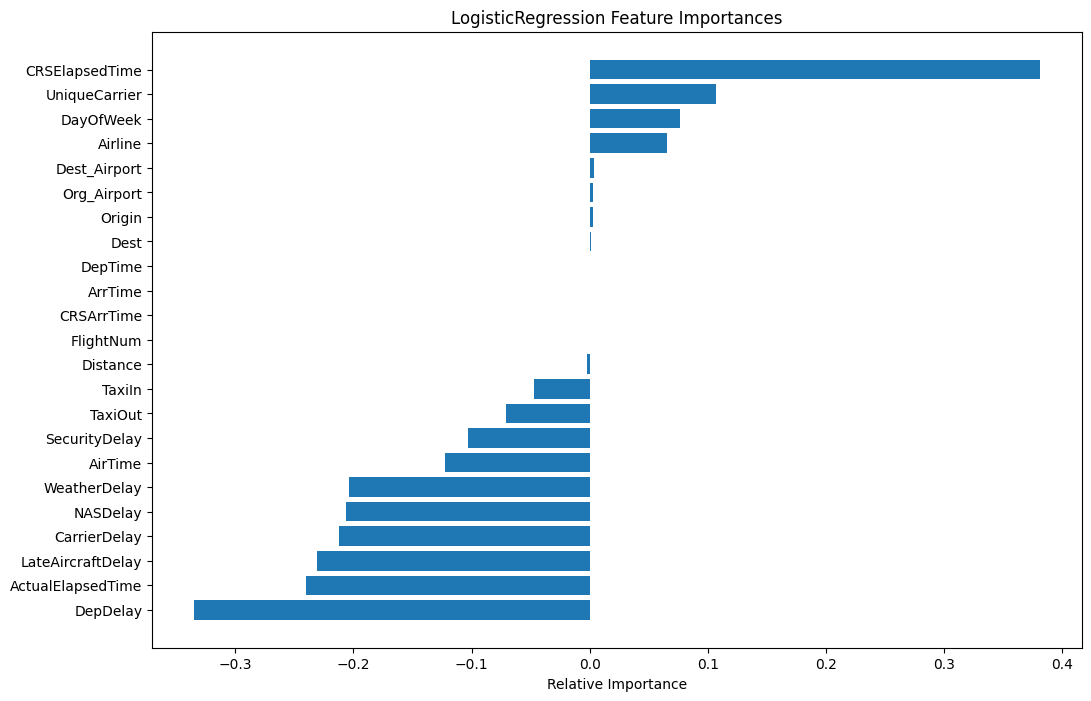

Fitting 3 folds for each of 3 candidates, totalling 9 fits
DecisionTree Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19340
           1       0.88      0.90      0.89       556

    accuracy                           0.99     19896
   macro avg       0.94      0.95      0.94     19896
weighted avg       0.99      0.99      0.99     19896

DecisionTree Best Model Confusion Matrix:
[[19273    67]
 [   58   498]]




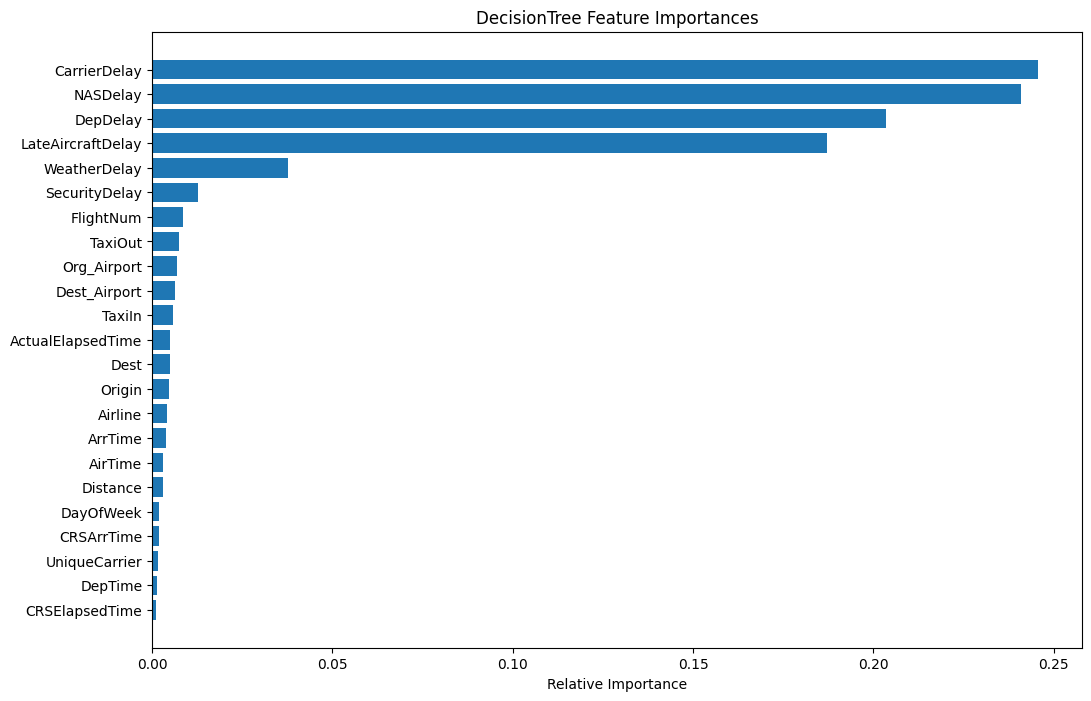

Fitting 3 folds for each of 4 candidates, totalling 12 fits
GradientBoosting Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19340
           1       0.95      0.76      0.84       556

    accuracy                           0.99     19896
   macro avg       0.97      0.88      0.92     19896
weighted avg       0.99      0.99      0.99     19896

GradientBoosting Best Model Confusion Matrix:
[[19320    20]
 [  136   420]]




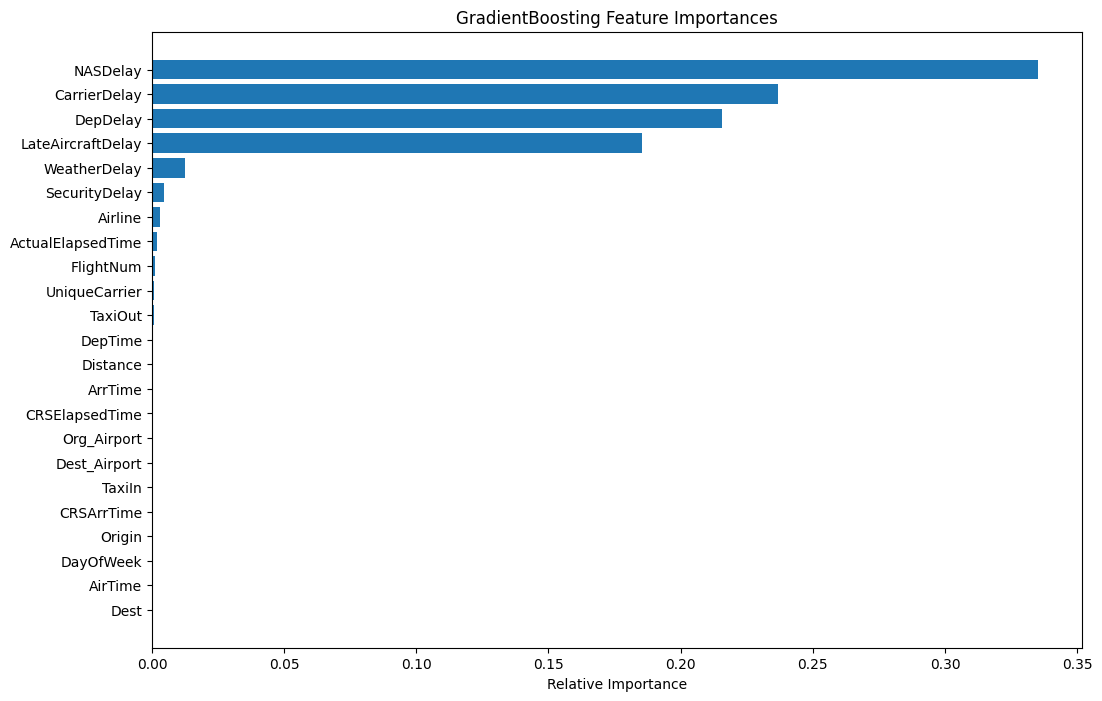

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Bagging Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19340
           1       0.97      0.89      0.93       556

    accuracy                           1.00     19896
   macro avg       0.98      0.94      0.96     19896
weighted avg       1.00      1.00      1.00     19896

Bagging Best Model Confusion Matrix:
[[19324    16]
 [   61   495]]


Fitting 3 folds for each of 4 candidates, totalling 12 fits
XGBoost Best Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19340
           1       0.99      0.96      0.98       556

    accuracy                           1.00     19896
   macro avg       1.00      0.98      0.99     19896
weighted avg       1.00      1.00      1.00     19896

XGBoost Best Model Confusion Matrix:
[[19337     3]
 [   23   533]]




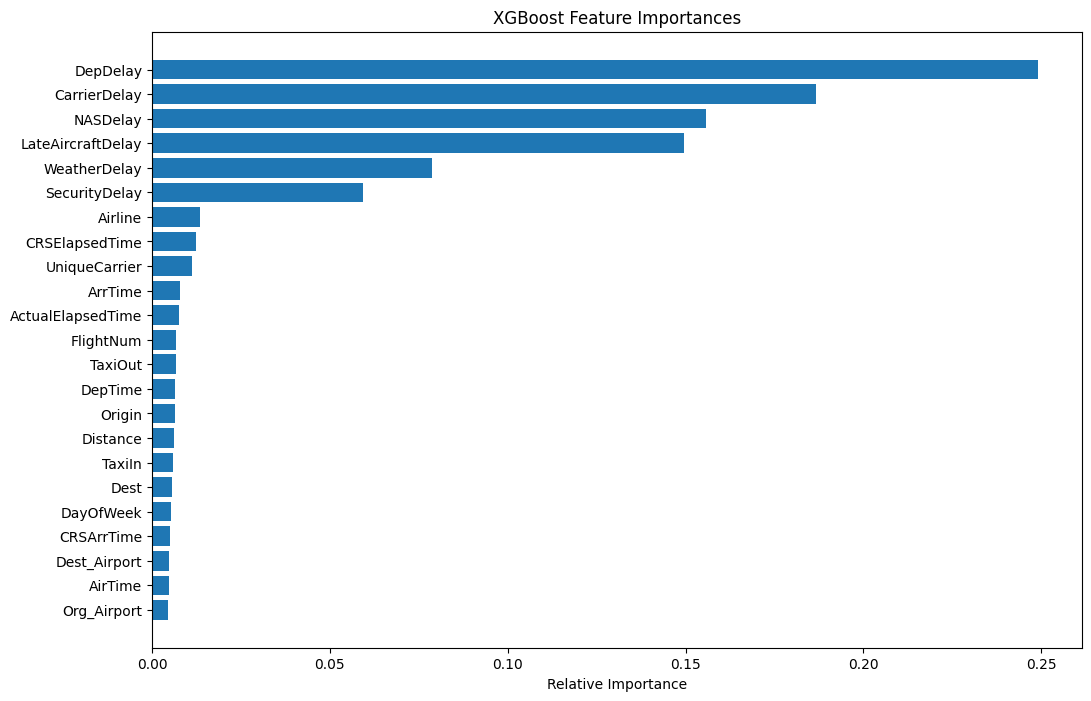

In [16]:
# Train and evaluate other models with hyperparameter tuning
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'Bagging': BaggingClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'DecisionTree': {'max_depth': [10, 20, 30]},
    'GradientBoosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]},
    'Bagging': {'n_estimators': [10, 50, 100]},
    'XGBoost': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
}

for model_name, model in classifiers.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=3, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    print(f"{model_name} Best Model Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Best Model Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

    # Calculate and plot feature importance
    if hasattr(best_model, 'feature_importances_'):
        importance = best_model.feature_importances_
        indices = np.argsort(importance)
        plt.figure(figsize=(12, 8))
        plt.title(f'{model_name} Feature Importances')
        plt.barh(range(len(indices)), importance[indices], align='center')
        plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    elif hasattr(best_model, 'coef_'):
        importance = best_model.coef_[0]
        indices = np.argsort(importance)
        plt.figure(figsize=(12, 8))
        plt.title(f'{model_name} Feature Importances')
        plt.barh(range(len(indices)), importance[indices], align='center')
        plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Number of positive: 2118, number of negative: 77463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4656
[LightGBM] [Info] Number of data points in the train set: 79581, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.026614 -> initscore=-3.599328
[LightGBM] [Info] Start training from score -3.599328
LightGBM Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19340
           1       1.00      0.98      0.99       556

    accuracy                           1.00     19896
   macro avg       1.00      0.99      0.99     19896
weighted avg       1.00      1.00      1.00     19896

LightGBM Model Co

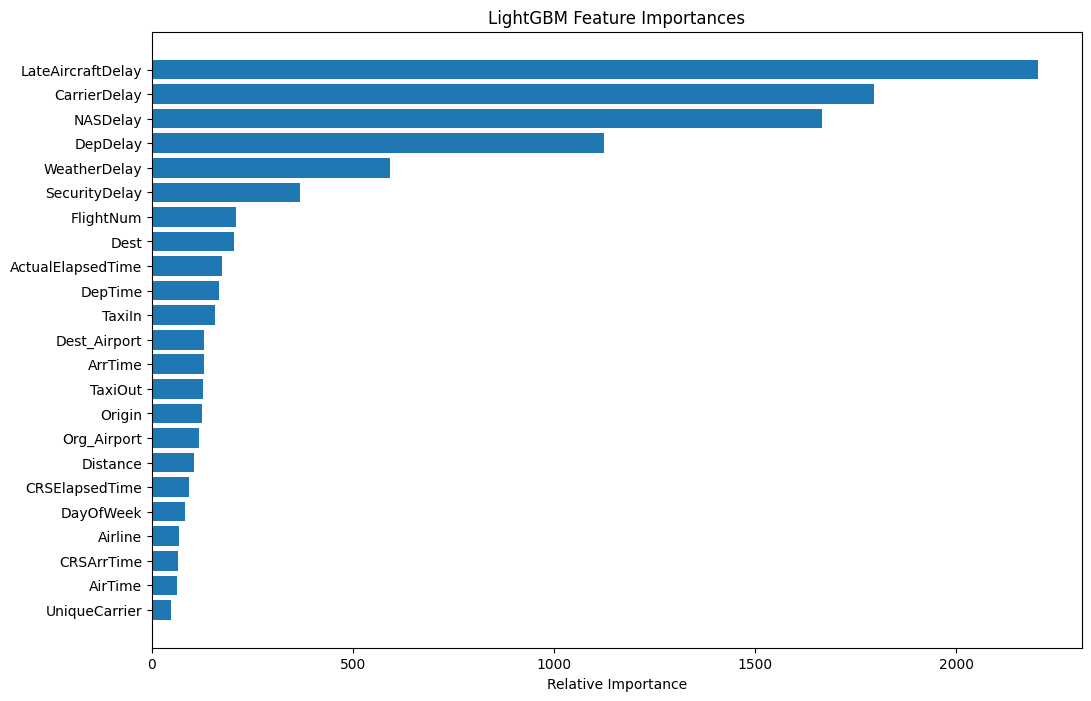

In [39]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt', 'dart'],
    'objective': ['binary']
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train.squeeze(), np.argmax(y_train, axis=1))

# Get the best model
best_lgb_model = grid_search.best_estimator_

# Make predictions and evaluate the LightGBM model
y_pred = best_lgb_model.predict(X_test.squeeze())
print("LightGBM Model Classification Report:")
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print("LightGBM Model Confusion Matrix:")
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

# Calculate and plot feature importance
importance = best_lgb_model.feature_importances_
indices = np.argsort(importance)
plt.figure(figsize=(12, 8))
plt.title('LightGBM Feature Importances')
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
